In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/emails.csv")
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [ ]:
data.shape

(5728, 2)

In [ ]:
data['text'][0]

"Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  ma

In [ ]:
data['spam'].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

In [ ]:
import seaborn as sns

<Axes: xlabel='spam', ylabel='count'>

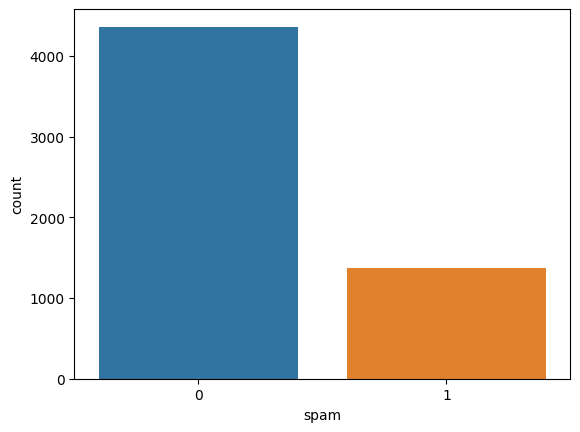

In [ ]:
sns.countplot(x='spam', data=data)


In [ ]:
X = data['text'].values
y = data['spam'].values

In [ ]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2 , random_state= 0)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer()
x_train = cv.fit_transform(X_train)

In [ ]:
x_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [ ]:
#####Training by ML Algorithm###

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train, y_train)

MultinomialNB()

In [ ]:
x_test = cv.transform(X_test)
len(x_test.toarray()[0])

33764

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print("Testing Accuracy:")
y_pred = nb.predict(x_test)
accuracy_score(y_pred, y_test)

Testing Accuracy:


0.9869109947643979

In [ ]:
print("Training Accuracy:")
nb.score(x_train,y_train)

Training Accuracy:


0.9954168485377565

In [ ]:
email = ['Hey, Jack whats up dude? Tomorrow please meet with me at my home.']
clean_email = cv.transform(email)
len(clean_email.toarray()[0])
check = nb.predict(clean_email)[0]

In [ ]:
email = ['Subject: re : recovery plan  it would be funny if it were not quite so close to the truth !']
clean_email = cv.transform(email)
check = nb.predict(clean_email)[0]

if check == 0:
    print("This is a Ham Email!")
else:
    print("This is a Spam Email!")

This is a Ham Email!


In [ ]:
email = ['Hey i am Elon Musk. Get a brand new car from Tesla']

clean_email = cv.transform(email)
check = nb.predict(clean_email)[0]

if check == 0:
    print("This is a Ham Email!")
else:
    print("This is a Spam Email!")

This is a Spam Email!


In [ ]:
# Save the trained model
import joblib

joblib.dump(nb, 'naive_bayes_model.pkl')

# Download the saved model file
from google.colab import files

files.download('naive_bayes_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>